In [1]:
%matplotlib inline
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from glob import glob
import os
img_path = "./Images"
os.makedirs(img_path, exist_ok=True)

In [3]:
old = glob("./reference_results_2.18.0.0timing_*.pickle")
old

['.\\reference_results_2.18.0.0timing_0.pickle',
 '.\\reference_results_2.18.0.0timing_1.pickle']

In [4]:
new = glob("./reference_results_2.18.0.1.devtiming_*.pickle")
new

['.\\reference_results_2.18.0.1.devtiming_2.pickle',
 '.\\reference_results_2.18.0.1.devtiming_3.pickle']

In [5]:
def read_pickle(paths):
    dfs = []
    for path in paths:
        with open(path, "rb") as f:
            d = pickle.load(f)
        df = pd.DataFrame.from_dict(d).T.reset_index().rename(columns={
            'level_0':'parameters',
            'level_1':'N',
            0:'permuted',
            1:'not permuted',
            2:'ndarray',
            3:'timeit',
        })
        dfs.append(df)
    return dfs

In [6]:
df_old = read_pickle(old)

In [7]:
df_new = read_pickle(new)

In [8]:
new_df = pd.concat(df_new)

In [9]:
old_df = pd.concat(df_old)

In [10]:
new_df.to_csv("./new_extract.csv")
old_df.to_csv("./old_extract.csv")

In [11]:
plt.style.use('ggplot')

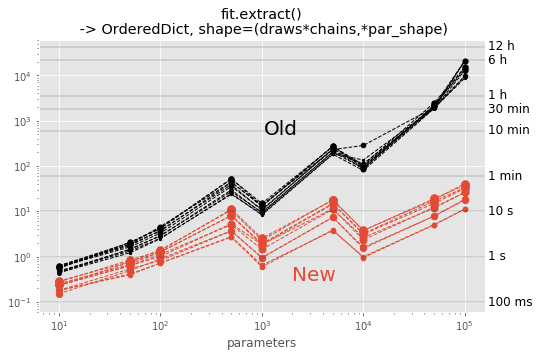

In [12]:
plt.figure(figsize=(8,5))

ax = plt.gca()
for i, df in enumerate(df_new):
    for j, (N, df_) in enumerate(df.groupby('N')):
        ms = np.log(N)
        df_.plot(x='parameters', y='permuted', color='C0', lw=1, ls='--', markersize=ms, marker='o', ax=ax, legend=False)

for i, df in enumerate(df_old):
    for j, (N, df_) in enumerate(df.groupby('N')):
        ms = np.log(N/10)
        df_.plot(x='parameters', y='permuted', color='k', lw=1, ls='--', markersize=ms, marker='o', ax=ax, legend=False)

plt.title("fit.extract()\n -> OrderedDict, shape=(draws*chains,*par_shape)")

for key, i in {'100 ms' : 0.1, 
               '1 s' : 1, 
               '10 s' : 10, 
               '1 min' : 60,
               '10 min' : 60*10,
               '30 min' : 60*30,
               '1 h' : 60*60,
               '6 h' : 60*60*6,
               '12 h' : 60*60*12,
              }.items():
    plt.axhline(i, color='k', lw=0.2)
    plt.text(1.7e5, i, key, verticalalignment='center', fontsize=12)
    
plt.text(1.04e3, 4.8e2, "Old", color='k', fontsize=20)
plt.text(2e3, 3e-1, "New", color='C0', fontsize=20)

plt.ylim(6e-2, 6e4)
plt.yscale('log')
plt.xscale('log')
plt.savefig(os.path.join(img_path, "permuted_true"), dpi=300, bbox_inches='tight')

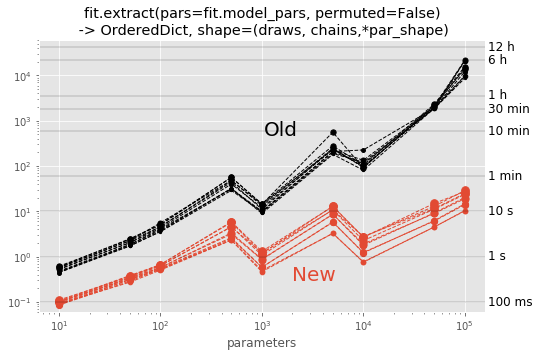

In [13]:
plt.figure(figsize=(8,5))

ax = plt.gca()
for i, df in enumerate(df_new):
    for j, (N, df_) in enumerate(df.groupby('N')):
        ms = np.log(N)
        df_.plot(x='parameters', y='not permuted', color='C0', lw=1, ls='--', markersize=ms, marker='o', ax=ax, legend=False)

for i, df in enumerate(df_old):
    for j, (N, df_) in enumerate(df.groupby('N')):
        ms = np.log(N/10)
        df_.plot(x='parameters', y='not permuted', color='k', lw=1, ls='--', markersize=ms, marker='o', ax=ax, legend=False)

plt.title("fit.extract(pars=fit.model_pars, permuted=False)\n -> OrderedDict, shape=(draws, chains,*par_shape)")

for key, i in {'100 ms' : 0.1, 
               '1 s' : 1, 
               '10 s' : 10, 
               '1 min' : 60,
               '10 min' : 60*10,
               '30 min' : 60*30,
               '1 h' : 60*60,
               '6 h' : 60*60*6,
               '12 h' : 60*60*12,
              }.items():
    plt.axhline(i, color='k', lw=0.2)
    plt.text(1.7e5, i, key, verticalalignment='center', fontsize=12)
    
plt.text(1.04e3, 4.8e2, "Old", color='k', fontsize=20)
plt.text(2e3, 3e-1, "New", color='C0', fontsize=20)

plt.ylim(6e-2, 6e4)
plt.yscale('log')
plt.xscale('log')
plt.savefig(os.path.join(img_path, "permuted_false"), dpi=300, bbox_inches='tight')

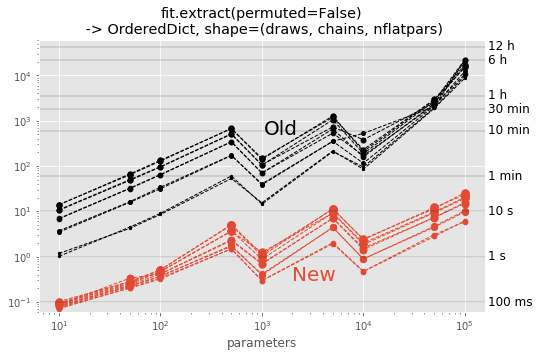

In [14]:
plt.figure(figsize=(8,5))

ax = plt.gca()
for i, df in enumerate(df_new):
    for j, (N, df_) in enumerate(df.groupby('N')):
        ms = np.log(N)
        df_.plot(x='parameters', y='ndarray', color='C0', lw=1, ls='--', markersize=ms, marker='o', ax=ax, legend=False)

for i, df in enumerate(df_old):
    for j, (N, df_) in enumerate(df.groupby('N')):
        ms = np.log(N/10)
        df_.plot(x='parameters', y='ndarray', color='k', lw=1, ls='--', markersize=ms, marker='o', ax=ax, legend=False)

plt.title("fit.extract(permuted=False)\n -> OrderedDict, shape=(draws, chains, nflatpars)")

for key, i in {'100 ms' : 0.1, 
               '1 s' : 1, 
               '10 s' : 10, 
               '1 min' : 60,
               '10 min' : 60*10,
               '30 min' : 60*30,
               '1 h' : 60*60,
               '6 h' : 60*60*6,
               '12 h' : 60*60*12,
              }.items():
    plt.axhline(i, color='k', lw=0.2)
    plt.text(1.7e5, i, key, verticalalignment='center', fontsize=12)
    
plt.text(1.04e3, 4.8e2, "Old", color='k', fontsize=20)
plt.text(2e3, 3e-1, "New", color='C0', fontsize=20)

plt.ylim(6e-2, 6e4)
plt.yscale('log')
plt.xscale('log')
plt.savefig(os.path.join(img_path, "ndarray"), dpi=300, bbox_inches='tight')

In [21]:
new_df.max()

parameters      100000.000000
N                 2000.000000
permuted            41.099749
not permuted        28.863488
ndarray             25.848428
timeit            1000.000000
dtype: float64

In [22]:
old_df.max()

parameters      100000.000000
N                 2000.000000
permuted         21380.838455
not permuted     21714.602562
ndarray          22299.625136
timeit            1000.000000
dtype: float64

In [23]:
old_df.max()/new_df.max()

parameters        1.000000
N                 1.000000
permuted        520.218228
not permuted    752.320798
ndarray         862.707200
timeit            1.000000
dtype: float64

In [27]:
(old_df / new_df).mean()

parameters        1.000000
N                 1.000000
permuted        107.908039
not permuted    137.815630
ndarray         267.187492
timeit            1.000000
dtype: float64

In [28]:
(old_df / new_df).apply(lambda x: np.median(x))

parameters        1.000000
N                 1.000000
permuted          8.886409
not permuted     13.952534
ndarray         129.395990
timeit            1.000000
dtype: float64